In [8]:
%matplotlib inline
import os
from glob import glob
from collections import Counter
import nltk
from os.path import basename
import pandas as pd
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Olga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
with open("data/positive-words.txt", encoding="utf8") as inp:
    positive_words=set(inp.read().splitlines())
with open("data/negative-words.txt", encoding="utf8") as inp:
    negative_words=set(inp.read().splitlines())

def sentiment(filename, positive_words, negative_words):
    with open(filename, encoding="utf8") as file:
        file = file.read()
        filex = file.lower()
        punctuation = '!@#$%^&*()_-+={}[]:;"\'|<>,.?/~`'
        for words in filex:
            if words in punctuation:
                files =filex.replace(words, "")

        tokenize= files.split()
        sentiment = 0
        for words in tokenize:
            if words in positive_words:
                sentiment += 1
            if words in negative_words:
                sentiment -=1
        return sentiment

sentiment_results = {}
for filename in glob("Up all night-FirstAlbum1D/*.txt"):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
        name = os.path.basename(filename)
        sentiment_results[name] = analyze_sentiment(text)

sentiment_results


{'Everything about you.txt': 0.09891774891774892,
 'Gotta be you.txt': 0.2025862068965517,
 'I want.txt': 0.06562499999999999,
 'I wish.txt': -0.1522727272727273,
 'Moments.txt': 0.06908212560386474,
 'More than this.txt': 0.2727268806073155,
 'One Thing.txt': 0.2583333333333333,
 'Same mistakes.txt': 0.021093749999999998,
 'Save you tonight.txt': -0.08311688311688313,
 'Stand Up.txt': 0.04513888888888889,
 'Stole my heart.txt': 0.24529220779220778,
 'Taken .txt': 0.14930555555555558,
 'tell me a lie.txt': -0.01289682539682541,
 'Up all night.txt': 0.042857142857142864,
 'what makes you beautiful.txt': 0.2692063492063491}

In [14]:
import os
from glob import glob

# Read positive and negative words
with open("data/positive-words.txt", encoding="utf8") as inp:
    positive_words = set(inp.read().splitlines())
with open("data/negative-words.txt", encoding="utf8") as inp:
    negative_words = set(inp.read().splitlines())

def sentiment(text, positive_words, negative_words):
    text = text.lower()
    punctuation = '!@#$%^&*()_-+={}[]:;"\'|<>,.?/~`'
    for char in punctuation:
        text = text.replace(char, "")
    
    tokenize = text.split()
    sentiment = 0
    for word in tokenize:
        if word in positive_words:
            sentiment += 1
        if word in negative_words:
            sentiment -= 1
    return sentiment

sentiment_results = {}
for filename in glob("Up all night-FirstAlbum1D/*.txt"):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
    name = os.path.basename(filename)
    sentiment_results[name] = sentiment(text, positive_words, negative_words)

print(sentiment_results)

{'Everything about you.txt': 5, 'Gotta be you.txt': -5, 'I want.txt': 0, 'I wish.txt': -11, 'Moments.txt': 1, 'More than this.txt': 11, 'One Thing.txt': -6, 'Same mistakes.txt': -13, 'Save you tonight.txt': -4, 'Stand Up.txt': -5, 'Stole my heart.txt': 4, 'Taken .txt': 2, 'tell me a lie.txt': -13, 'Up all night.txt': 1, 'what makes you beautiful.txt': 7}


In [16]:
import pandas as pd
from tabulate import tabulate


df = pd.DataFrame.from_dict(sentiment_results, orient='index', columns=['Sentiment Score'])
df.index.name = 'Song'
df = df.sort_values('Sentiment Score', ascending=False)

df['Sentiment Score'] = df['Sentiment Score'].apply(lambda x: f"{x:.2f}")


table = tabulate(df, headers='keys', tablefmt='pipe', showindex=True)

print(table)

| Song                         |   Sentiment Score |
|:-----------------------------|------------------:|
| More than this.txt           |                11 |
| what makes you beautiful.txt |                 7 |
| Everything about you.txt     |                 5 |
| Stole my heart.txt           |                 4 |
| Taken .txt                   |                 2 |
| Moments.txt                  |                 1 |
| Up all night.txt             |                 1 |
| I want.txt                   |                 0 |
| Save you tonight.txt         |                -4 |
| Gotta be you.txt             |                -5 |
| Stand Up.txt                 |                -5 |
| One Thing.txt                |                -6 |
| I wish.txt                   |               -11 |
| Same mistakes.txt            |               -13 |
| tell me a lie.txt            |               -13 |


In [18]:
senti = pd.Series(sentiment_results)
print(senti)

Everything about you.txt         5
Gotta be you.txt                -5
I want.txt                       0
I wish.txt                     -11
Moments.txt                      1
More than this.txt              11
One Thing.txt                   -6
Same mistakes.txt              -13
Save you tonight.txt            -4
Stand Up.txt                    -5
Stole my heart.txt               4
Taken .txt                       2
tell me a lie.txt              -13
Up all night.txt                 1
what makes you beautiful.txt     7
dtype: int64


<Axes: >

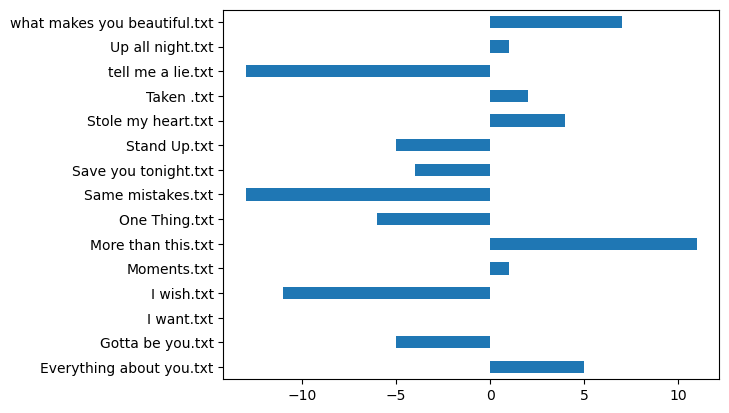

In [20]:
senti.plot.barh()

<Figure size 1200x800 with 0 Axes>

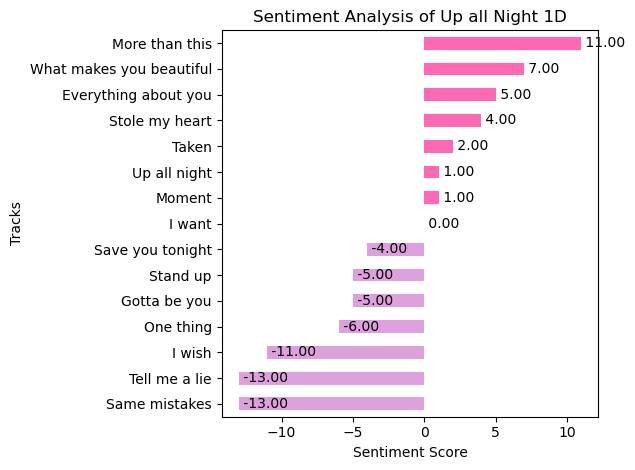

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Assuming sentiment_results is your dictionary with results
sentiment_results = {
    "More than this": 11,
    "What makes you beautiful": 7,
    "Everything about you": 5,
    "Stole my heart": 4,
    "Taken": 2,
    "Moment": 1,
    "Up all night": 1,
    "I want": 0,
    "Save you tonight": -4,
    "Gotta be you": -5,
    "Stand up": -5,
    "One thing": -6,
    "I wish": -11,
    "Same mistakes": -13,
    "Tell me a lie": -13
    
    
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(sentiment_results, orient='index', columns=['Sentiment Score'])
df.index.name = 'Song'
df = df.sort_values('Sentiment Score')

# Create a horizontal bar chart with custom colors
plt.figure(figsize=(12, 8))
colors = ['#FF69B4' if score >= 0 else '#DDA0DD' for score in df['Sentiment Score']]  # Pink for positive, Lilac for negative
df.plot(kind='barh', y='Sentiment Score', color=colors, legend=False)

plt.title("Sentiment Analysis of Up all Night 1D")
plt.xlabel("Sentiment Score")
plt.ylabel("Tracks")

# Add value labels to the end of each bar
for i, v in enumerate(df['Sentiment Score']):
    plt.text(v, i, f' {v:.2f}', va='center')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

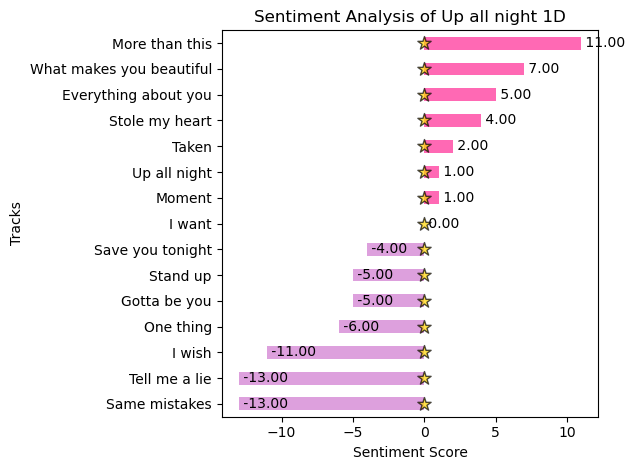

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming sentiment_results is your dictionary with results
sentiment_results = {
    "More than this": 11,
    "What makes you beautiful": 7,
    "Everything about you": 5,
    "Stole my heart": 4,
    "Taken": 2,
    "Moment": 1,
    "Up all night": 1,
    "I want": 0,
    "Save you tonight": -4,
    "Gotta be you": -5,
    "Stand up": -5,
    "One thing": -6,
    "I wish": -11,
    "Same mistakes": -13,
    "Tell me a lie": -13
    
    
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(sentiment_results, orient='index', columns=['Sentiment Score'])
df.index.name = 'Song'
df = df.sort_values('Sentiment Score')

# Create a horizontal bar chart with custom colors
plt.figure(figsize=(12, 8))
colors = ['#FF69B4' if score >= 0 else '#DDA0DD' for score in df['Sentiment Score']]  # Pink for positive, Lilac for negative
bars = df.plot(kind='barh', y='Sentiment Score', color=colors, legend=False)

plt.title("Sentiment Analysis of Up all night 1D")
plt.xlabel("Sentiment Score")
plt.ylabel("Tracks")

# Add value labels to the end of each bar
for i, v in enumerate(df['Sentiment Score']):
    plt.text(v, i, f' {v:.2f}', va='center')

# Adding stars at the start of each song
for i in range(len(df)):
    star_x = -0.05  # Positioning the star slightly before the start of each bar
    star_y = i + 0  # Centering vertically on each bar
    plt.scatter(star_x, star_y, color='gold', s=100, alpha=0.7, edgecolor='black', marker='*')  # Star effect

plt.tight_layout()
plt.show()

In [30]:
import os
from glob import glob

# Read positive and negative words
with open("data/positive-words.txt", encoding="utf8") as inp:
    positive_words = set(inp.read().splitlines())
with open("data/negative-words.txt", encoding="utf8") as inp:
    negative_words = set(inp.read().splitlines())

def sentiment(text, positive_words, negative_words):
    text = text.lower()
    punctuation = '!@#$%^&*()_-+={}[]:;"\'|<>,.?/~`'
    for char in punctuation:
        text = text.replace(char, "")
    
    tokenize = text.split()
    sentiment = 0
    for word in tokenize:
        if word in positive_words:
            sentiment += 1
        if word in negative_words:
            sentiment -= 1
    return sentiment

sentiment_results = {}
for filename in glob("Take me Home/*.txt"):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
    name = os.path.basename(filename)
    sentiment_results[name] = sentiment(text, positive_words, negative_words)

print(sentiment_results)

{'back for you.txt': 3, 'Change my mind.txt': 3, 'Cmon cmon.txt': -1, 'Heart attack.txt': -7, 'I would.txt': 15, 'Kiss you.txt': -1, 'Last first kiss.txt': 0, 'Little things.txt': 16, 'Live while were young.txt': -8, 'Loved you first.txt': 5, 'nobody compares.txt': 16, 'Over again.txt': -8, 'Rock me.txt': 2, 'shes not afraid.txt': -19, 'still the one.txt': -11, 'Summer love.txt': 17, 'they dont know about us.txt': 13}


In [48]:
senti = pd.Series(sentiment_results)
print(senti)


back for you.txt                3
Change my mind.txt              3
Cmon cmon.txt                  -1
Heart attack.txt               -7
I would.txt                    15
Kiss you.txt                   -1
Last first kiss.txt             0
Little things.txt              16
Live while were young.txt      -8
Loved you first.txt             5
nobody compares.txt            16
Over again.txt                 -8
Rock me.txt                     2
shes not afraid.txt           -19
still the one.txt             -11
Summer love.txt                17
they dont know about us.txt    13
dtype: int64


In [49]:
df = pd.DataFrame.from_dict(sentiment_results, orient='index', columns=['Sentiment Score'])
df = df.sort_values("Sentiment Score", ascending=False)
print(df)

                             Sentiment Score
Summer love.txt                           17
Little things.txt                         16
nobody compares.txt                       16
I would.txt                               15
they dont know about us.txt               13
Loved you first.txt                        5
Change my mind.txt                         3
back for you.txt                           3
Rock me.txt                                2
Last first kiss.txt                        0
Kiss you.txt                              -1
Cmon cmon.txt                             -1
Heart attack.txt                          -7
Over again.txt                            -8
Live while were young.txt                 -8
still the one.txt                        -11
shes not afraid.txt                      -19


<Figure size 1200x800 with 0 Axes>

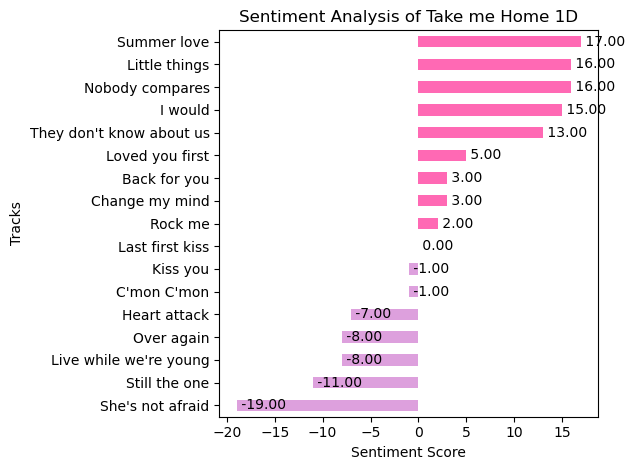

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming sentiment_results is your dictionary with results
sentiment_results = {
    "Summer love": 17,
    "Little things": 16,
    "Nobody compares": 16,
    "I would": 15,
    "They don't know about us": 13,
    "Loved you first": 5,
    "Change my mind": 3,
    "Back for you": 3,
    "Rock me": 2,
    "Last first kiss": 0,
    "Kiss you": -1,
    "C'mon C'mon": -1,
    "Heart attack": -7,
    "Over again": -8,
    "Live while we're young": -8,
    "Still the one": -11,
    "She's not afraid": -19
    
    
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(sentiment_results, orient='index', columns=['Sentiment Score'])
df.index.name = 'Song'
df = df.sort_values('Sentiment Score')

# Create a horizontal bar chart with custom colors
plt.figure(figsize=(12, 8))
colors = ['#FF69B4' if score >= 0 else '#DDA0DD' for score in df['Sentiment Score']]  # Pink for positive, Lilac for negative
bars = df.plot(kind='barh', y='Sentiment Score', color=colors, legend=False)

plt.title("Sentiment Analysis of Take me Home 1D")
plt.xlabel("Sentiment Score")
plt.ylabel("Tracks")

# Add value labels to the end of each bar
for i, v in enumerate(df['Sentiment Score']):
    plt.text(v, i, f' {v:.2f}', va='center')



plt.tight_layout()
plt.show()